<h1> Accessing and plotting ERCOT data </h1>
<h4>Download Site-Level Day-Ahead Fcsts:</h4>  

` aws s3 cp s3://arpa-e-perform/ERCOT/2018/Wind/Forecasts/Day-ahead/Site_level/{Site}_wind_day-ahead_fcst_2018.h5 ./`

<h4>Download Site-Level Actual:</h4>  

` aws s3 cp s3://arpa-e-perform/ERCOT/2018/Wind/Actuals/Site_level/{Site}_wind_actuals_2018.h5 ./`


In [31]:
import h5py
import pandas as pd
# import s3fs
import matplotlib.pyplot as plt
import datetime

# Intitial testing:


## Read and graph Site Actual vs. Day-Ahead wind power generation

In [ ]:
with h5py.File('Data/Site_Bethel_wind_day-ahead_fcst_2018.h5', 'r') as f:
    forecasts= pd.DataFrame(f['forecasts'][...])
    time_intervals = pd.DataFrame(f['forecast_time'][...]) 
    time_intervals[0] = time_intervals[0].str.decode("utf-8") #Convert from byte array to string
    fcst_time_steps = pd.to_datetime(f['forecast_time'][...].astype(str), format='%Y-%m-%d %H:%M:%S%z', errors='raise', utc = True)
    percentile50 = pd.DataFrame(forecasts[49]); #50th PERCENTILE
    percentile25 = pd.DataFrame(forecasts[24]); #50th PERCENTILE
    percentile75 = pd.DataFrame(forecasts[74]); #50th PERCENTILE
    percentile5 = pd.DataFrame(forecasts[4]); #50th PERCENTILE
    percentile95 = pd.DataFrame(forecasts[94]); #50th PERCENTILE
    
with h5py.File('Data/Site_Bethel_wind_actuals_2018.h5', 'r') as f:
    actuals = pd.DataFrame(f['actuals'][...])
    actual_time_steps = pd.to_datetime(f['time_index'][...].astype(str), errors='coerce', format='%Y-%m-%d %H:%M:%S')

plt.plot(actual_time_steps, actuals[0], label = "Actuals")
plt.plot(fcst_time_steps, percentile50, "r-", label= "50th Percentile")
plt.plot(fcst_time_steps, percentile25, "g-", label= "25th Percentile")
plt.plot(fcst_time_steps, percentile75, color = "orange", label= "75th Percentile")
plt.plot(fcst_time_steps, percentile95, color = "purple", label= "95th Percentile")
plt.plot(fcst_time_steps, percentile5, color = "pink", label= "5th Percentile")

plt.xlim(datetime.datetime(2018,9,1), datetime.datetime(2018,9,2)) # Format:(year, month, day, hour, min, sec)
plt.ylim(0,300)
plt.xticks(rotation='vertical')
plt.margins(0.2)
plt.xlabel("Date/Hour")
plt.ylabel("Power [MW]")
plt.title("1-Day Actual vs Day-Ahead Forecast (Bethel Wind Farm)")
plt.legend()
# plt.savefig("Bethel-1-day-actual-v-day-ahead-fcst.png")
plt.show()

# Wind Plots (Site Level, Intra-day) Plots the 5 Largest Wind Sites in Texas' ERCOT grid by Capacity:

- The ARPA-E PERFORM data is made available as a series of .h5 files and can be found on AWS at s3://arpa-e-perform/ 
- OR via its Open Energy Data Initiative (OEDI) catalog page at https://data.openei.org/s3_viewer?bucket=arpa-e-perform.
- The registry for the dataset can be found at https://registry.opendata.aws/arpa-e-perform/.

### **To get this to work on your machine, set up the following in your working directory:** 
1. Create a folder called "Data"
2. Inside the folder, create another folder named "Wind"
3. Place the following files in the 'Wind' Folder:
```
Data/Wind/Site_Buffalo_Gap_Wind_Farm_wind_actuals_2018.h5
Data/Wind/Site_buffalo_gap_wind_farm_wind_day-ahead_fcst_2018.h5
Data/Wind/Site_Capricorn_Ridge_wind_actuals_2018.h5
Data/Wind/Site_capricorn_ridge_wind_day-ahead_fcst_2018.h5
Data/Wind/Site_Horse_Hollow_wind_actuals_2018.h5
Data/Wind/Site_horse_hollow_wind_day-ahead_fcst_2018.h5
Data/Wind/Site_Los_Vientos_wind_actuals_2018.h5
Data/Wind/Site_los_vientos_wind_day-ahead_fcst_2018.h5
Data/Wind/Site_Sweetwater_wind_actuals_2018.h5
Data/Wind/Site_sweetwater_wind_day-ahead_fcst_2018.h5
```

<HDF5 file "Site_Buffalo_Gap_Wind_Farm_wind_actuals_2018.h5" (mode r)>
<HDF5 file "Site_buffalo_gap_wind_farm_wind_day-ahead_fcst_2018.h5" (mode r)>


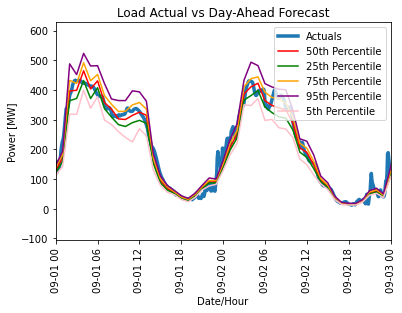

<HDF5 file "Site_Capricorn_Ridge_wind_actuals_2018.h5" (mode r)>
<HDF5 file "Site_capricorn_ridge_wind_day-ahead_fcst_2018.h5" (mode r)>


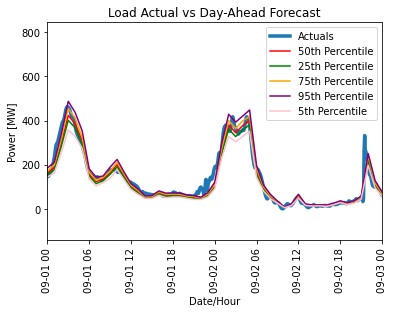

<HDF5 file "Site_Horse_Hollow_wind_actuals_2018.h5" (mode r)>
<HDF5 file "Site_horse_hollow_wind_day-ahead_fcst_2018.h5" (mode r)>


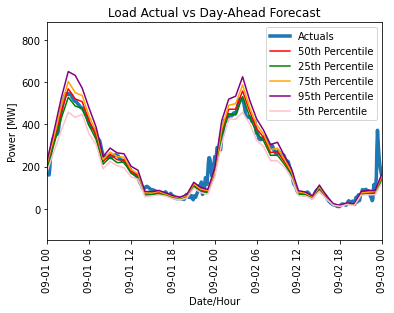

<HDF5 file "Site_Los_Vientos_wind_actuals_2018.h5" (mode r)>
<HDF5 file "Site_los_vientos_wind_day-ahead_fcst_2018.h5" (mode r)>


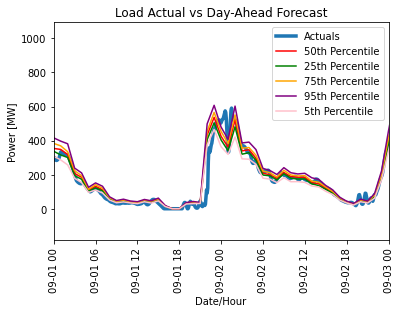

<HDF5 file "Site_Sweetwater_wind_actuals_2018.h5" (mode r)>
<HDF5 file "Site_sweetwater_wind_day-ahead_fcst_2018.h5" (mode r)>


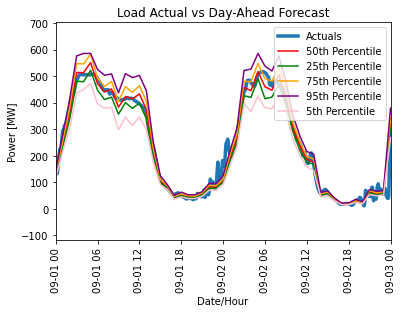

In [59]:
import glob
path = "Data/Wind/"
files = glob.glob(path + "*.h5")
counter = 0
files.sort()

startmonth = input("Enter start month (1-12): ")
startday = input("Enter start day: ")
endmonth = input("Enter end month: ")
endday = input("Enter end day: ")

for i in range(0,int(len(files)/2),1):    
    with h5py.File(files[i], 'r') as f:
        print(f)
        actuals = pd.DataFrame(f['actuals'][...])
        actual_time_steps = pd.to_datetime(f['time_index'][...].astype(str), errors='coerce', format='%Y-%m-%d %H:%M:%S')
    
    with h5py.File(files[i+5], 'r') as f:
        print(f)
        forecasts= pd.DataFrame(f['forecasts'][...])
        time_intervals = pd.DataFrame(f['forecast_time'][...]) 
        time_intervals[0] = time_intervals[0].str.decode("utf-8") #Convert from byte array to string
        fcst_time_steps = pd.to_datetime(f['forecast_time'][...].astype(str), format='%Y-%m-%d %H:%M:%S%z', errors='raise', utc = True)
        percentile50 = pd.DataFrame(forecasts[49]); #50th PERCENTILE
        percentile25 = pd.DataFrame(forecasts[24]); #50th PERCENTILE
        percentile75 = pd.DataFrame(forecasts[74]); #50th PERCENTILE
        percentile5 = pd.DataFrame(forecasts[4]); #50th PERCENTILE
        percentile95 = pd.DataFrame(forecasts[94]); #50th PERCENTILE

    plt.plot(actual_time_steps, actuals[0], label = "Actuals", linewidth = 3.5)
    plt.plot(fcst_time_steps, percentile50, "r-", label= "50th Percentile")
    plt.plot(fcst_time_steps, percentile25, "g-", label= "25th Percentile")
    plt.plot(fcst_time_steps, percentile75, color = "orange", label= "75th Percentile")
    plt.plot(fcst_time_steps, percentile95, color = "purple", label= "95th Percentile")
    plt.plot(fcst_time_steps, percentile5, color = "pink", label= "5th Percentile")
    plt.xlim(datetime.datetime(2018,int(startmonth),int(startday)), datetime.datetime(2018,int(endmonth),int(endday))) # Format:(year, month, day, hour, min, sec)
    plt.xticks(rotation='vertical')
    plt.margins(0.2)
    plt.xlabel("Date/Hour")
    plt.ylabel("Power [MW]")
    plt.title("Load Actual vs Day-Ahead Forecast")
    plt.legend()
    plt.show()

In [ ]:
import glob
path = "Data/Wind/"
files = glob.glob(path + "*.h5")
counter = 0
files.sort()
for i in range(0,int(len(files)/2),1):
    print(files[i])
    print(files[i+5])

# Load Plots (Zone-Level, Intra-Day):

- The ARPA-E PERFORM data is made available as a series of .h5 files and can be found on AWS at s3://arpa-e-perform/ 
- OR via its Open Energy Data Initiative (OEDI) catalog page at https://data.openei.org/s3_viewer?bucket=arpa-e-perform.
- The registry for the dataset can be found at https://registry.opendata.aws/arpa-e-perform/.

### **The following cell plots the Actual vs. Expected load for 8 different zones in the ERCOT grid:**
1. create a folder named 'Load' within your 'Data' directory
2. Place the following files in the 'Load'folder:
```
Data/Load/Zone_Coast_load_actuals_2018.h5
Data/Load/Zone_Coast_load_intra-day_fcst_2018.h5
Data/Load/Zone_East_load_actuals_2018.h5
Data/Load/Zone_East_load_intra-day_fcst_2018.h5
Data/Load/Zone_Far_West_load_actuals_2018.h5
Data/Load/Zone_Far_West_load_intra-day_fcst_2018.h5
Data/Load/Zone_North_Central_load_actuals_2018.h5
Data/Load/Zone_North_Central_load_intra-day_fcst_2018.h5
Data/Load/Zone_North_load_actuals_2018.h5
Data/Load/Zone_North_load_intra-day_fcst_2018.h5
Data/Load/Zone_South_Central_load_actuals_2018.h5
Data/Load/Zone_South_Central_load_intra-day_fcst_2018.h5
Data/Load/Zone_Southern_load_actuals_2018.h5
Data/Load/Zone_Southern_load_intra-day_fcst_2018.h5
Data/Load/Zone_West_load_actuals_2018.h5
Data/Load/Zone_West_load_intra-day_fcst_2018.h5
```

In [ ]:
import glob
path = "Data/Load/"
files = glob.glob(path + "*.h5")
counter = 0
files.sort()

startmonth = input("Enter start month (1-12): ")
startday = input("Enter start day: ")
endmonth = input("Enter end month: ")
endday = input("Enter end day: ")

for i in range(0,len(files)-1,2):
    with h5py.File(files[i], 'r') as f:
        print(f)
        actuals = pd.DataFrame(f['actuals'][...])
        actual_time_steps = pd.to_datetime(f['time_index'][...].astype(str), errors='coerce', format='%Y-%m-%d %H:%M:%S')
    
    with h5py.File(files[i+1], 'r') as f:
        print(f)
        forecasts= pd.DataFrame(f['forecasts'][...])
        time_intervals = pd.DataFrame(f['forecast_time'][...]) 
        time_intervals[0] = time_intervals[0].str.decode("utf-8") #Convert from byte array to string
        fcst_time_steps = pd.to_datetime(f['forecast_time'][...].astype(str), format='%Y-%m-%d %H:%M:%S%z', errors='raise', utc = True)
        percentile50 = pd.DataFrame(forecasts[49]); #50th PERCENTILE
        percentile25 = pd.DataFrame(forecasts[24]); #50th PERCENTILE
        percentile75 = pd.DataFrame(forecasts[74]); #50th PERCENTILE
        percentile5 = pd.DataFrame(forecasts[4]); #50th PERCENTILE
        percentile95 = pd.DataFrame(forecasts[94]); #50th PERCENTILE

    plt.plot(actual_time_steps, actuals[0], label = "Actuals", linewidth = 3.5)
    plt.plot(fcst_time_steps, percentile50, "r-", label= "50th Percentile")
    plt.plot(fcst_time_steps, percentile25, "g-", label= "25th Percentile")
    plt.plot(fcst_time_steps, percentile75, color = "orange", label= "75th Percentile")
    plt.plot(fcst_time_steps, percentile95, color = "purple", label= "95th Percentile")
    plt.plot(fcst_time_steps, percentile5, color = "pink", label= "5th Percentile")
    plt.xlim(datetime.datetime(2018,int(startmonth),int(startday)), datetime.datetime(2018,int(endmonth),int(endday))) # Format:(year, month, day, hour, min, sec)
    plt.xticks(rotation='vertical')
    plt.margins(0.2)
    plt.xlabel("Date/Hour")
    plt.ylabel("Power [MW]")
    plt.title("Load Actual vs Day-Ahead Forecast")
    plt.legend()
    plt.show()

In [ ]:
import glob
path = "Data/Load/"
files = glob.glob(path + "*.h5")
counter = 0
files.sort()
for i in range(0,len(files)-1,2):
    print(files[i])
    print(files[i+1])

# ARIMA MODEL

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:               105120
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -424935.547
Date:                Mon, 25 Apr 2022   AIC                         849883.094
Time:                        20:30:07   BIC                         849940.471
Sample:                             0   HQIC                        849900.467
                             - 105120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5505      0.000   2052.604      0.000       0.550       0.551
ar.L2         -0.2161      0.000   -555.708      0.000      -0.217      -0.215
ar.L3          0.1158      0.000    244.633      0.0

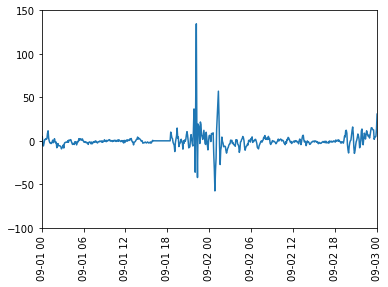

In [61]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

with h5py.File('Data/Wind/Site_Los_Vientos_wind_actuals_2018.h5', 'r') as f:
    actuals = pd.DataFrame(f['actuals'][...])
    actual_time_steps = pd.to_datetime(f['time_index'][...].astype(str), errors='coerce', format='%Y-%m-%d %H:%M:%S')
    

# autocorrelation_plot(actuals)
model = ARIMA(actuals, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
# print(residuals)
plt.plot(actual_time_steps.to_numpy(), residuals.to_numpy())
plt.xlim(datetime.datetime(2018,9,1), datetime.datetime(2018,9,3)) # Format:(year, month, day, hour, min, sec)
plt.xticks(rotation='vertical')
plt.margins(0.2)
plt.ylim(-100,150)
plt.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# plt.show()
# summary stats of residuals
# print(residuals.describe())



In [50]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

with h5py.File('Data/Wind/Site_Los_Vientos_wind_actuals_2018.h5', 'r') as f:
    df = pd.DataFrame(f['time_index'])    


In [51]:
df

,0
0,b'2018-01-01 00:00:00+00:00'
1,b'2018-01-01 00:05:00+00:00'
2,b'2018-01-01 00:10:00+00:00'
3,b'2018-01-01 00:15:00+00:00'
4,b'2018-01-01 00:20:00+00:00'
...,...
105115,b'2018-12-31 23:35:00+00:00'
105116,b'2018-12-31 23:40:00+00:00'
105117,b'2018-12-31 23:45:00+00:00'
105118,b'2018-12-31 23:50:00+00:00'
